In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_json("/content/sample_data/Sarcasm_Headlines_Dataset_v2.json", lines=True)
print(data.head())

   is_sarcastic  ...                                       article_link
0             1  ...  https://www.theonion.com/thirtysomething-scien...
1             0  ...  https://www.huffingtonpost.com/entry/donna-edw...
2             0  ...  https://www.huffingtonpost.com/entry/eat-your-...
3             1  ...  https://local.theonion.com/inclement-weather-p...
4             1  ...  https://www.theonion.com/mother-comes-pretty-c...

[5 rows x 3 columns]


In [ ]:
data = data[["headline", "is_sarcastic"]]
x = np.array(data["headline"])
y = np.array(data["is_sarcastic"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [ ]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array(X)
Y = np.array(y)
kf = KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)

for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70] TEST: [0 1 2 3 4 5 6 7]
TRAIN: [ 0  1  2  3  4  5  6  7 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70] TEST: [ 8  9 10 11 12 13 14]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70] TEST: [15 16 17 18 19 20 21]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70] TEST: [22 23 24 25 26 27 28]
TRAIN: [ 0  1  2  3  4  5  

In [ ]:
cv = CountVectorizer()    # Text to tokens
X = cv.fit_transform(x) # Fit the Data

In [ ]:
#Bernouli NaiveBays
model = BernoulliNB()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))



0.9275387639222538
0.8511530398322851


In [ ]:
y_pred = model.predict(X_test)

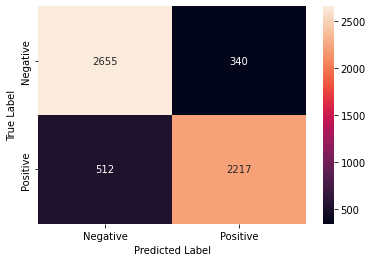

In [ ]:
def draw_Confusion_Matrix(actual, predicted):
    from sklearn.metrics import confusion_matrix

    class_label = ["Negative", "Positive"]
    conf_matrix = confusion_matrix(actual, predicted)
    df_cm = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
    hm = sns.heatmap(df_cm, annot = True, fmt = "d")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


draw_Confusion_Matrix(y_test, y_pred)

In [ ]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.9614326272111815
0.8406708595387841


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators = 12, random_state = 0)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9932736405328675
0.790356394129979


In [ ]:
#Using linear support vector classifier
model=LinearSVC()
#training the model
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9965494649486788
0.8261705101327743
